## Контрольная работа 4 Вариант 4

### Задача 1 Численное дифференцирование (1.5 балла)

Вычислить градиент, используя numpy функцию gradient:

- Построить функцию $f(x)=x \cdot e^{-x^2-y^2} \quad$ в области $[-2,2] \times[-2,2]$ с шагом $h_x=0.1 \quad$ и $h_y=0.1$
- Вычислить градиент и изобразить его на том же самом графике (как векторное поле)
- Вычислить погрешность относительно аналитической производной, используя np.linalg.norm.

>__Примечание.__ Векторное поле можно построить по аналогии с этим кодом:

>`x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))`
>
>`u = -x/np.sqrt(x\**2 + y\**2)`
>
>`v = y/np.sqrt(x\**2 + y\**2)`
>
>`plt.quiver(x,y,u,v)`
>
>`plt.show()`

In [51]:
def analitical_grad(x, y):
    d_dx = -2 * np.power(x, 2) * np.exp(-np.power(x, 2) - np.power(y, 2)) + np.exp(-np.power(x, 2) - np.power(y, 2))
    d_dy = -x * 2 *y * np.exp(-np.power(x, 2) - np.power(y, 2))
    return np.array([d_dx, d_dy])

(2, 41, 41)
(2, 41, 41)
(41, 41)
Вторая норма разности между истинным и численным значениями по y: 0.144
Вторая норма разности между истинным и численным значениями по x: 0.053


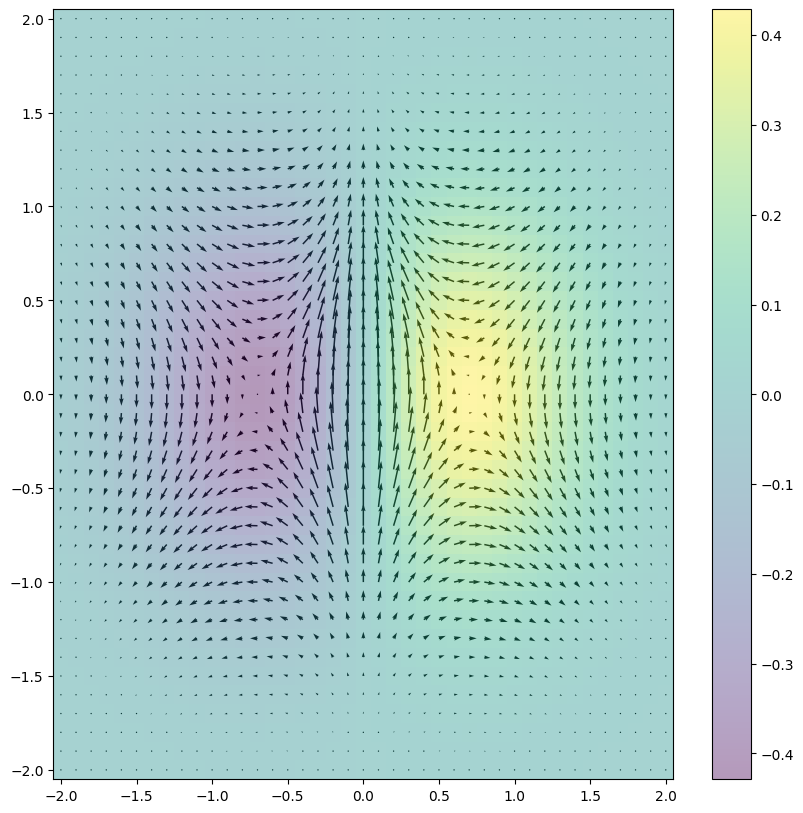

In [132]:
h_x, h_y = 0.1, 0.1
x, y = np.arange(-2, 2 + h_x, h_x), np.arange(-2, 2 + h_y, h_y)
X, Y = np.meshgrid(x, y)
F = X * np.exp(-np.power(X, 2) - np.power(Y, 2))
grad = np.array(np.gradient(F, h_x, h_y))
print(grad.shape)
grad_analitical = analitical_grad(X, Y)
print(grad_analitical.shape)
erro_x = np.linalg.norm(grad_analitical[1] - grad[0], ord = 2)
erro_y = np.linalg.norm(grad_analitical[0] - grad[1], ord = 2) 
print(erro.shape)
print(f"Вторая норма разности между истинным и численным значениями по y: {erro_y:.3f}")
print(f"Вторая норма разности между истинным и численным значениями по x: {erro_x:.3f}")
plt.figure(figsize = (10, 10))
plt.quiver(X, Y, grad[0, :, :], grad[1, :, :])
plt.pcolormesh(X, Y, F, alpha = 0.4)
plt.colorbar()

### Задача 2  Численное интегрирование (4 балла)

Вычислить интеграл от осциллирующей функции с точностью $10^{-6}$ (Оценивать точность алгоритмом Рунге):

a) $\int_0^1 \frac{\sin 100 x d x}{1+x}$,

б) $\int_1^2 \cos 100 x \ln x d x$.


In [129]:


def trapezoid(f, h):
    return 0.5 * h * (f[0] + 2 * sum(f[1:-1]) + f[-1])
f1 = lambda x: np.sin(100 * x) / (1 + x)
f2 = lambda x: np.cos(100 * x) * np.log(x)
# h_vals = 
limits = [(0, 1), (1, 2)]
p = 4
for f, lims in zip([f1, f2], limits):
    print("---"*20)
    int_vals = [200, 800]
    h = 0.1
    err = [20]
    i = 0
    while np.abs(err[-1]) > 1e-6:
        h/=2
        int_vals = list(int_vals)
        x = np.arange(lims[0], lims[1] + h, h)
        f_samples = f(x)
        integral = trapezoid(f_samples, h)
        int_vals.append(integral)
        int_vals = np.array(int_vals)
        err = (np.roll(int_vals, 1) - int_vals) / 3 
        print(f"Шаг {h:.10f}, Значение интеграла {integral:.5f}, Ошибка рунге {err[-1]:.8f}")
    
        

------------------------------------------------------------
Шаг 0.0500000000, Значение интеграла -0.01871, Ошибка рунге 266.67290476
Шаг 0.0250000000, Значение интеграла 0.00238, Ошибка рунге -0.00703253
Шаг 0.0125000000, Значение интеграла 0.00494, Ошибка рунге -0.00085235
Шаг 0.0062500000, Значение интеграла 0.00551, Ошибка рунге -0.00019098
Шаг 0.0031250000, Значение интеграла 0.00565, Ошибка рунге -0.00004657
Шаг 0.0015625000, Значение интеграла 0.00569, Ошибка рунге -0.00001157
Шаг 0.0007812500, Значение интеграла 0.00570, Ошибка рунге -0.00000289
Шаг 0.0003906250, Значение интеграла 0.00570, Ошибка рунге -0.00000072
------------------------------------------------------------
Шаг 0.0500000000, Значение интеграла 0.01917, Ошибка рунге 266.66027824
Шаг 0.0250000000, Значение интеграла -0.00262, Ошибка рунге 0.00726219
Шаг 0.0125000000, Значение интеграла 0.00109, Ошибка рунге -0.00123729
Шаг 0.0062500000, Значение интеграла -0.00592, Ошибка рунге 0.00233637
Шаг 0.0031250000, Значе

### Задача 3  Интерполяция (2 балла)

(Т. К. Старожилова) При исследовании некоторой химической реакции через каждые 2 секунды измерялась температура смеси. Результаты измерений представлены в таблице.

| $t, \mathrm{c}$ | 5 | 7 | 9 | 11 | 13 | 15 | 17 | 19 | 21 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| $T, \mathrm{~K}$ | 296 | 520 | 744 | 982 | 1248 | 1570 | 2256 | 2256 | 2256 |

С помощью сплайн-интерполяции найти $t^*$, при котором производная $d T / d t$ максимальна. Построить график интерполяции и удостовериться, что сплайн "не колеблется".


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import interpolate

Максимум производной при t = 15.80


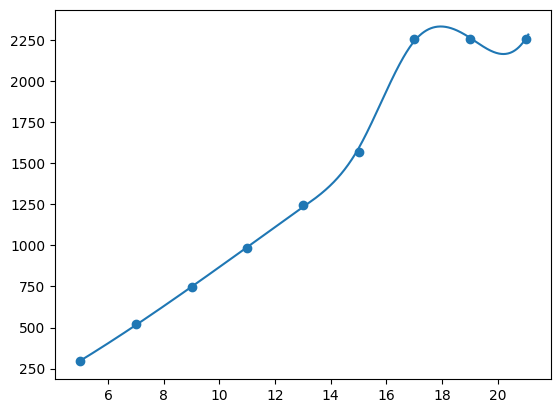

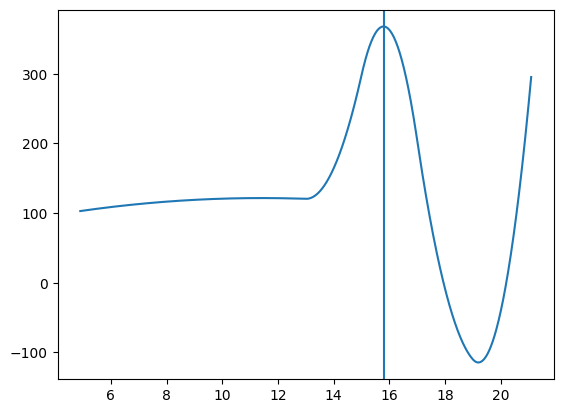

In [89]:
T = [296, 520, 744, 982, 1248, 1570, 2256, 2256, 2256]
t = [5, 7, 9, 11, 13, 15, 17, 19, 21]
interp = interpolate.UnivariateSpline(t, T, s = 1000)
t_line = np.linspace(np.min(t) - 0.1, np.max(t) + 0.1, 1000)
T_interp = interp(t_line)
interpolation_derivative = interp.derivative()(t_line)
t_line_deriv, interpolation_derivative = t_line, interpolation_derivative
plt.plot(t_line, T_interp)
plt.scatter(t, T)
plt.figure()
result = t_line[np.argmax(interpolation_derivative)]
plt.plot(t_line_deriv, interpolation_derivative)
plt.axvline(result)
print(f"Максимум производной при t = {result:.2f}")

### Задача 4  Ряды (1 балл)

Вычислить сумму ряда

$$
\sum_{n=1}^{\infty} \frac{1}{n(n-1)-3^{-n}}
$$

с точностью $\varepsilon=10^{-6}$. Обоснуйте, почему исходная точность достигнута.

### Задача 5  Дискретное преобразование Фурье (1.5 балла)

Построить графики дискретного преобразования Фурье для

$$
x(k)=\left\{\begin{array}{c}
\cos \left(\frac{2 \pi}{N} k\right) + \mathcal{N}(\sigma, 0), \quad 0 \leq k \leq N-1, \\
0, \quad \text { при других } k .
\end{array}\right.
$$

при $N=128$ и $\sigma$ в промежутке от 0 до 0.5. Как изменяется картина спектра?

$\mathcal{N}(\sigma, 0)$ - гауссов шум с дисперсией $\sigma^2$.


In [18]:
import scipy.stats as sts
from scipy import fft

In [31]:
print(1 / N) #частота коминуса

0.0078125


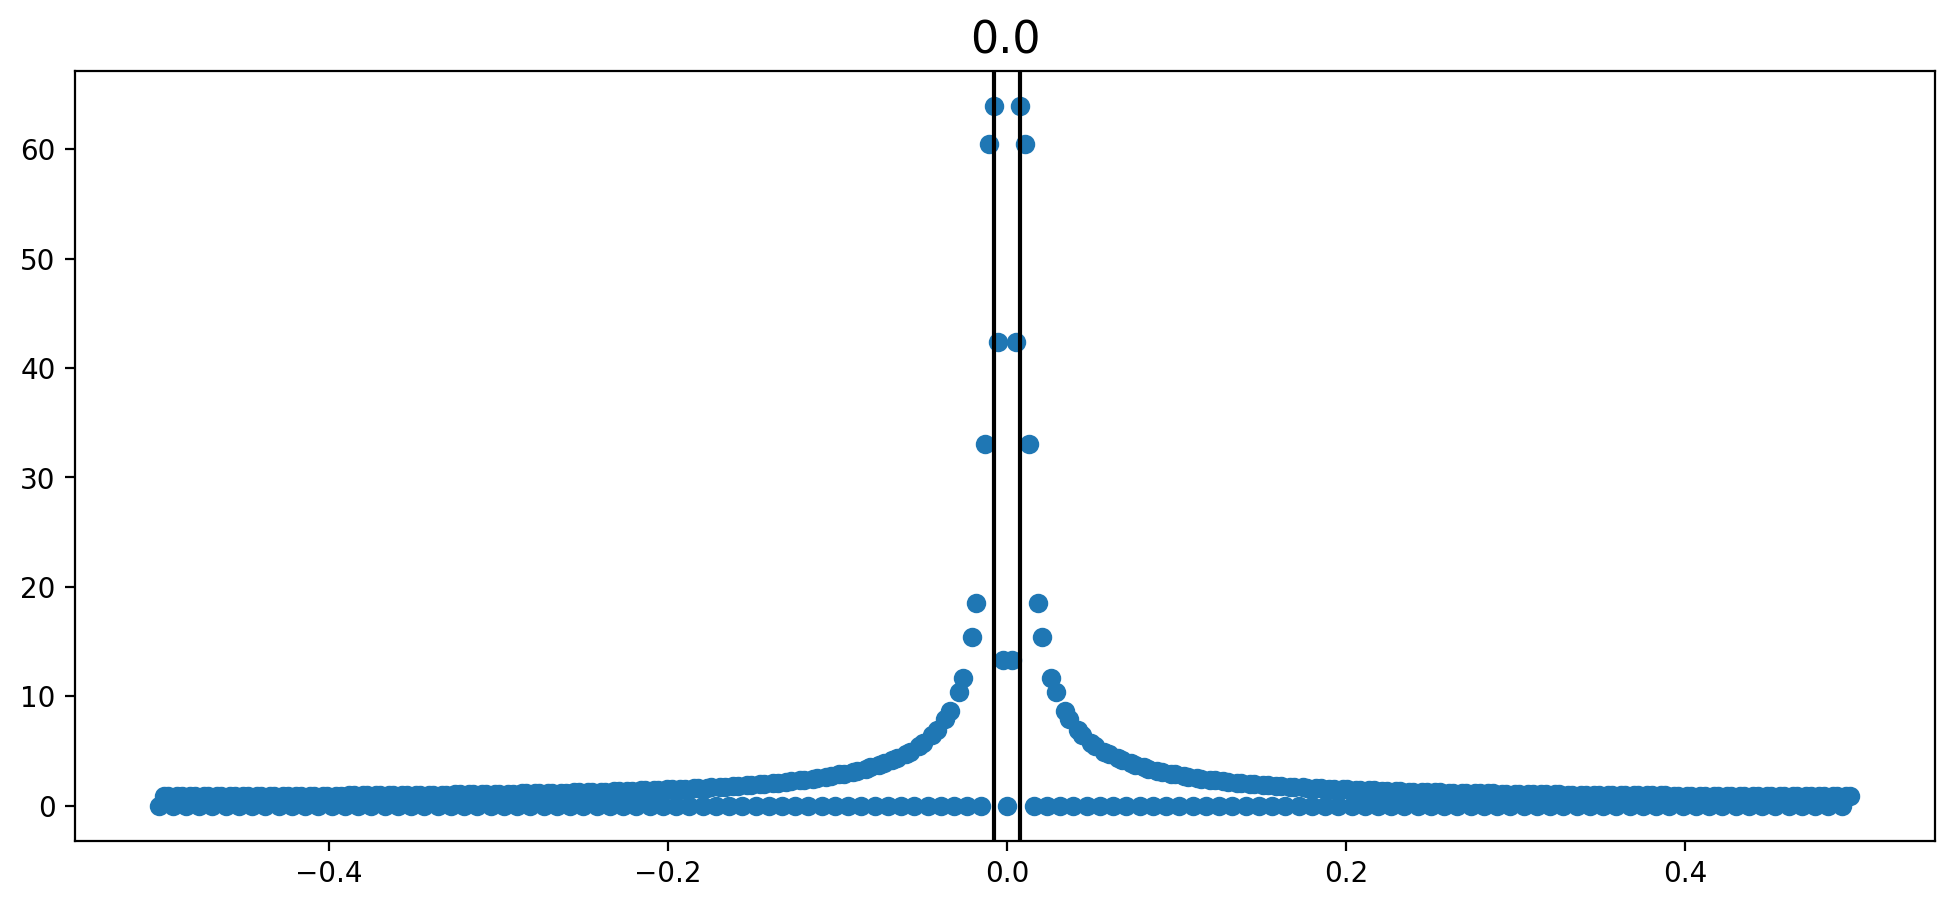

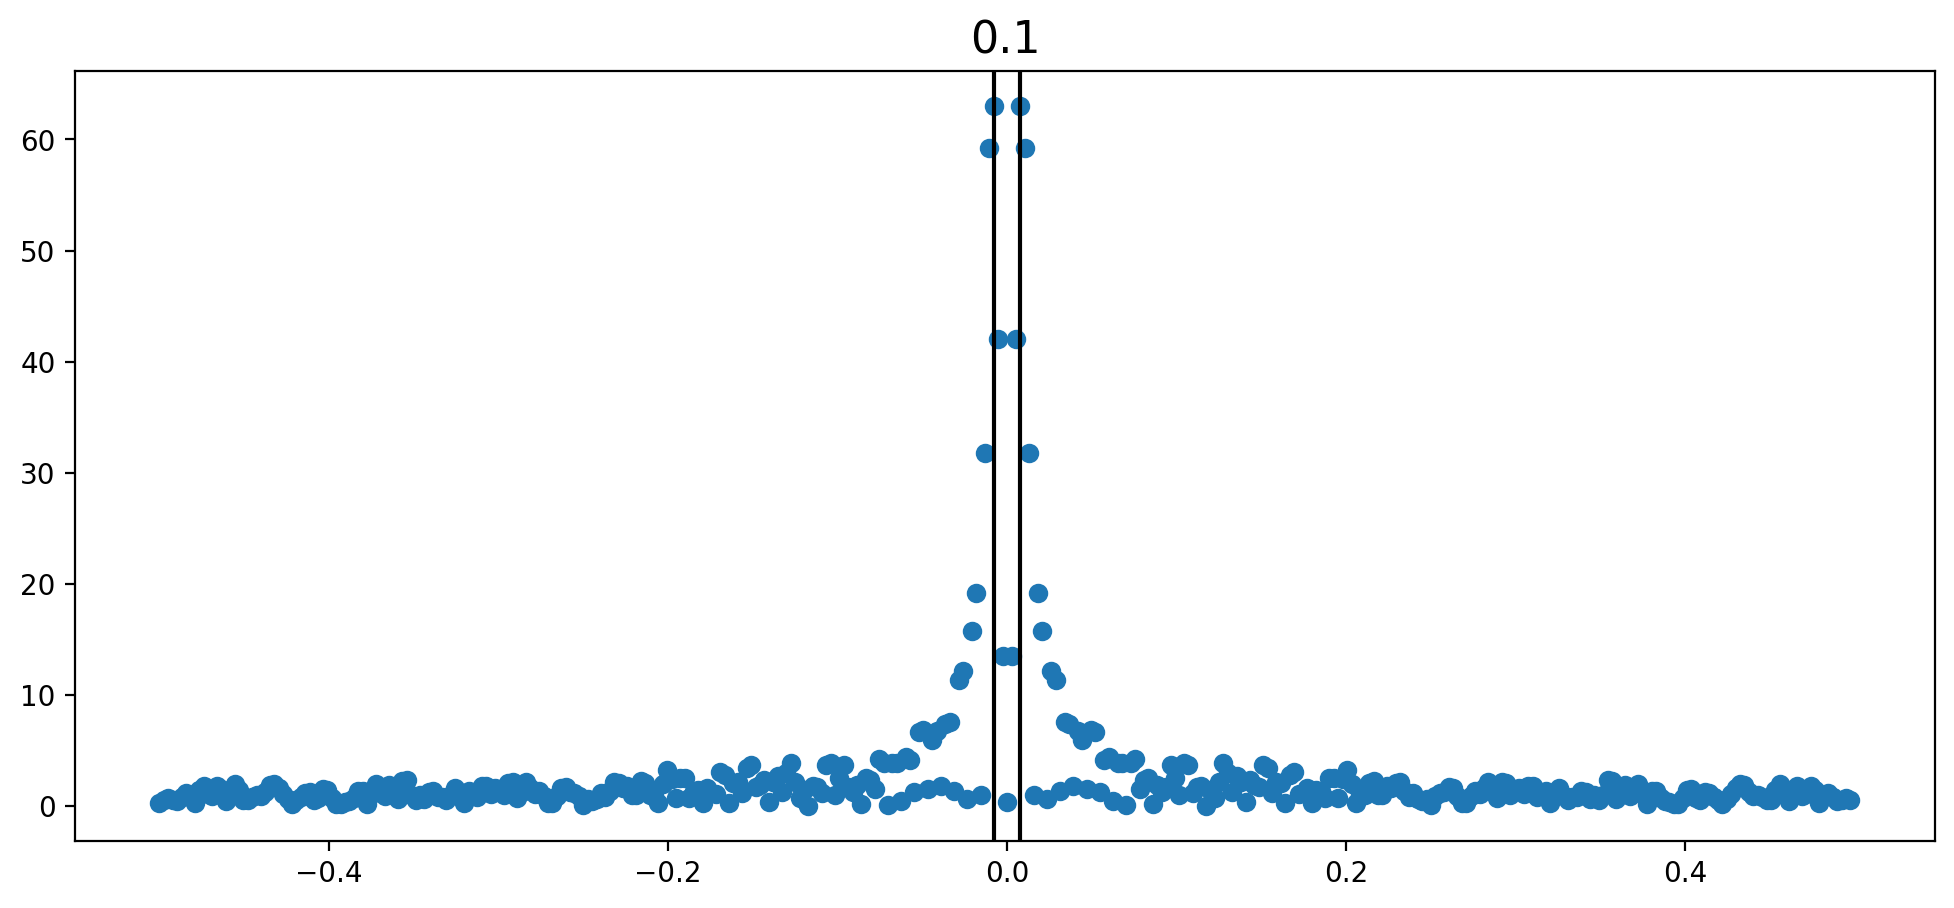

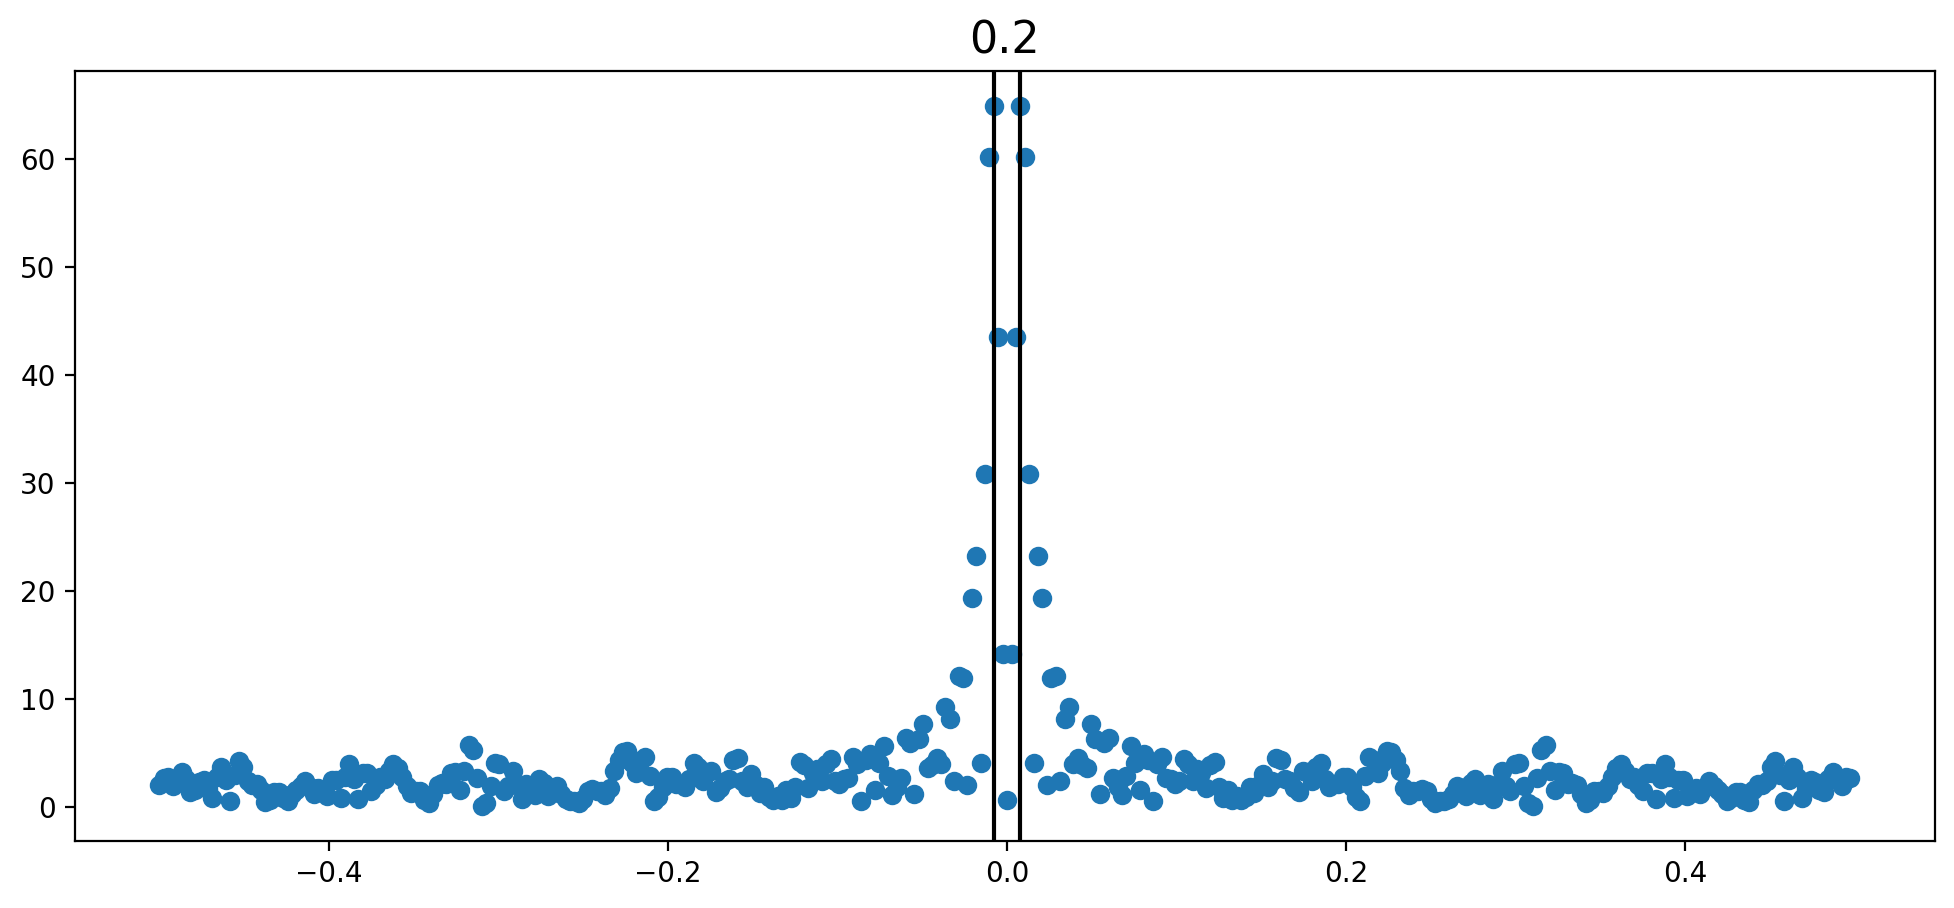

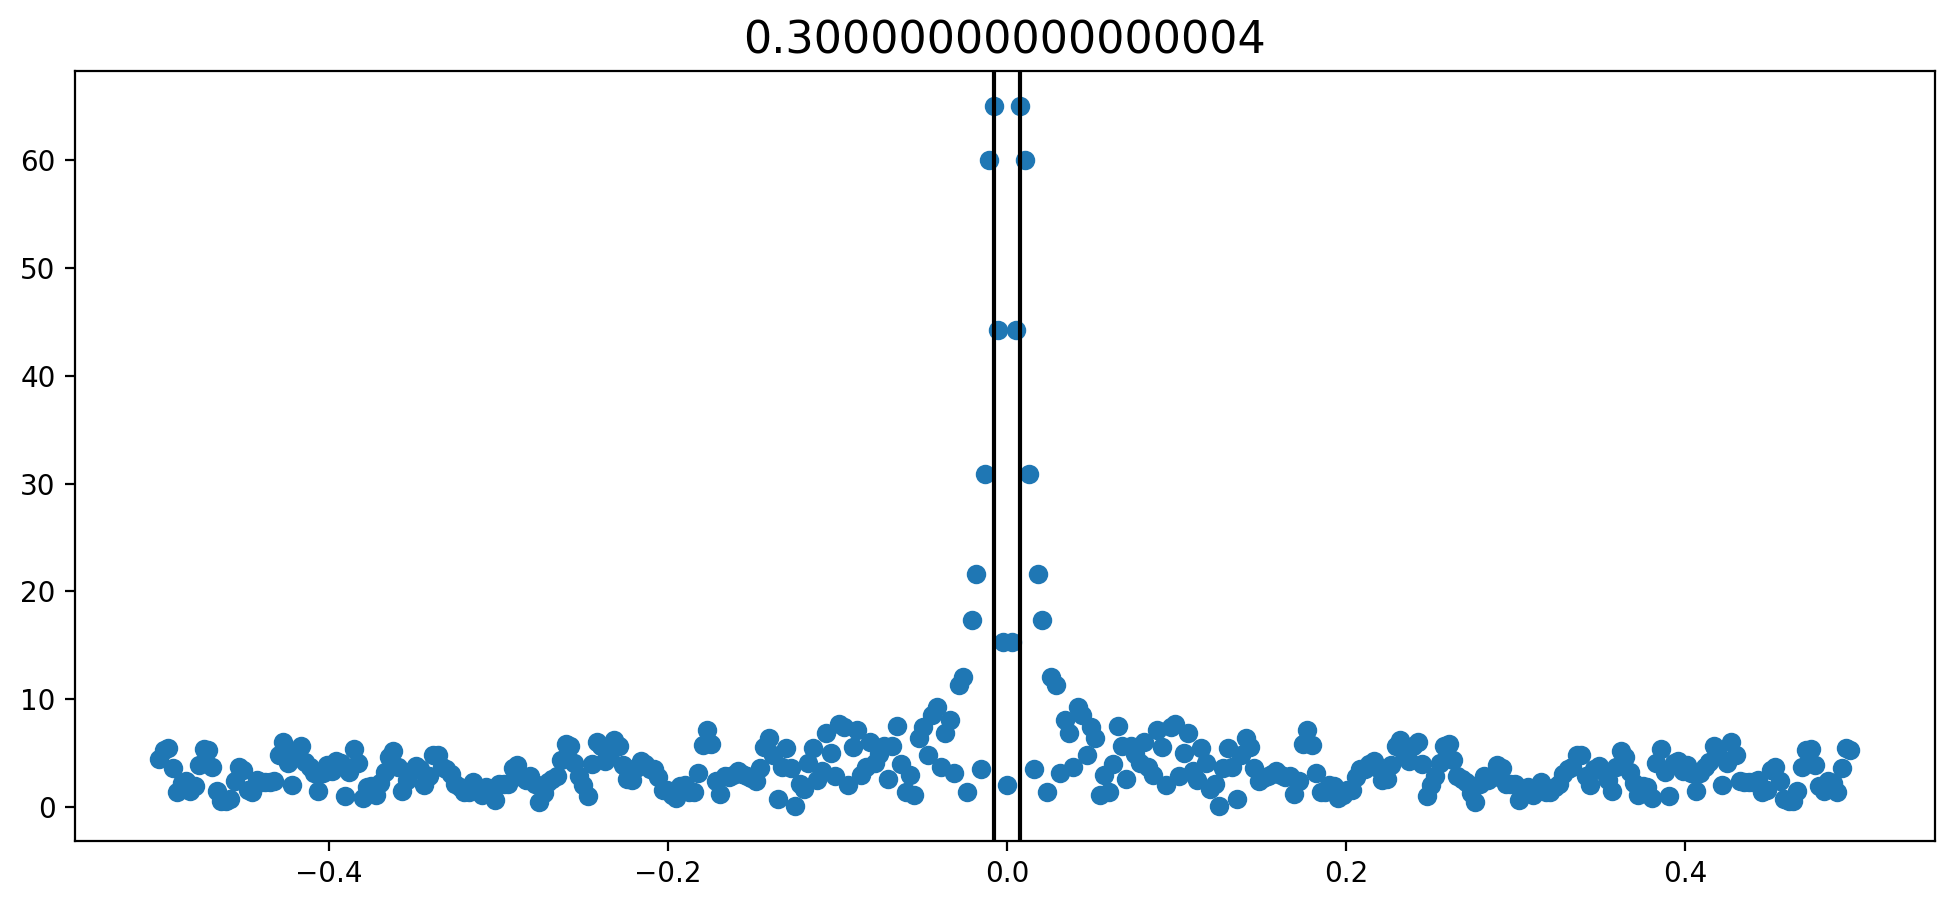

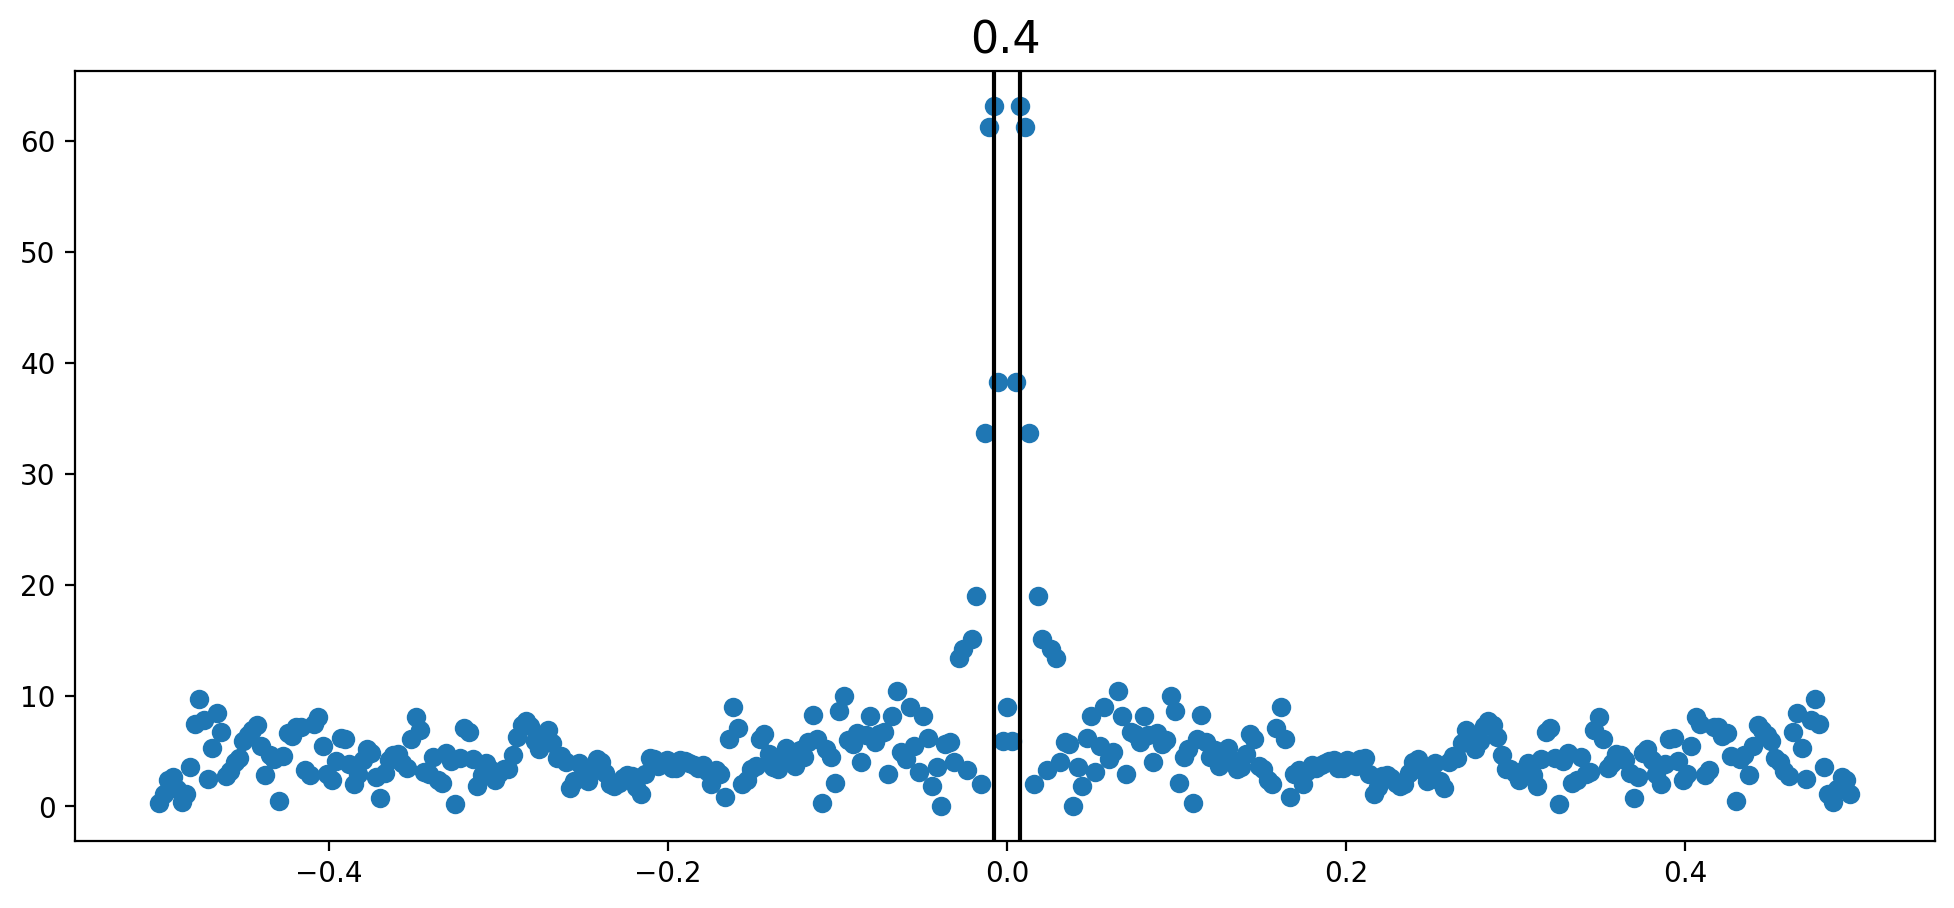

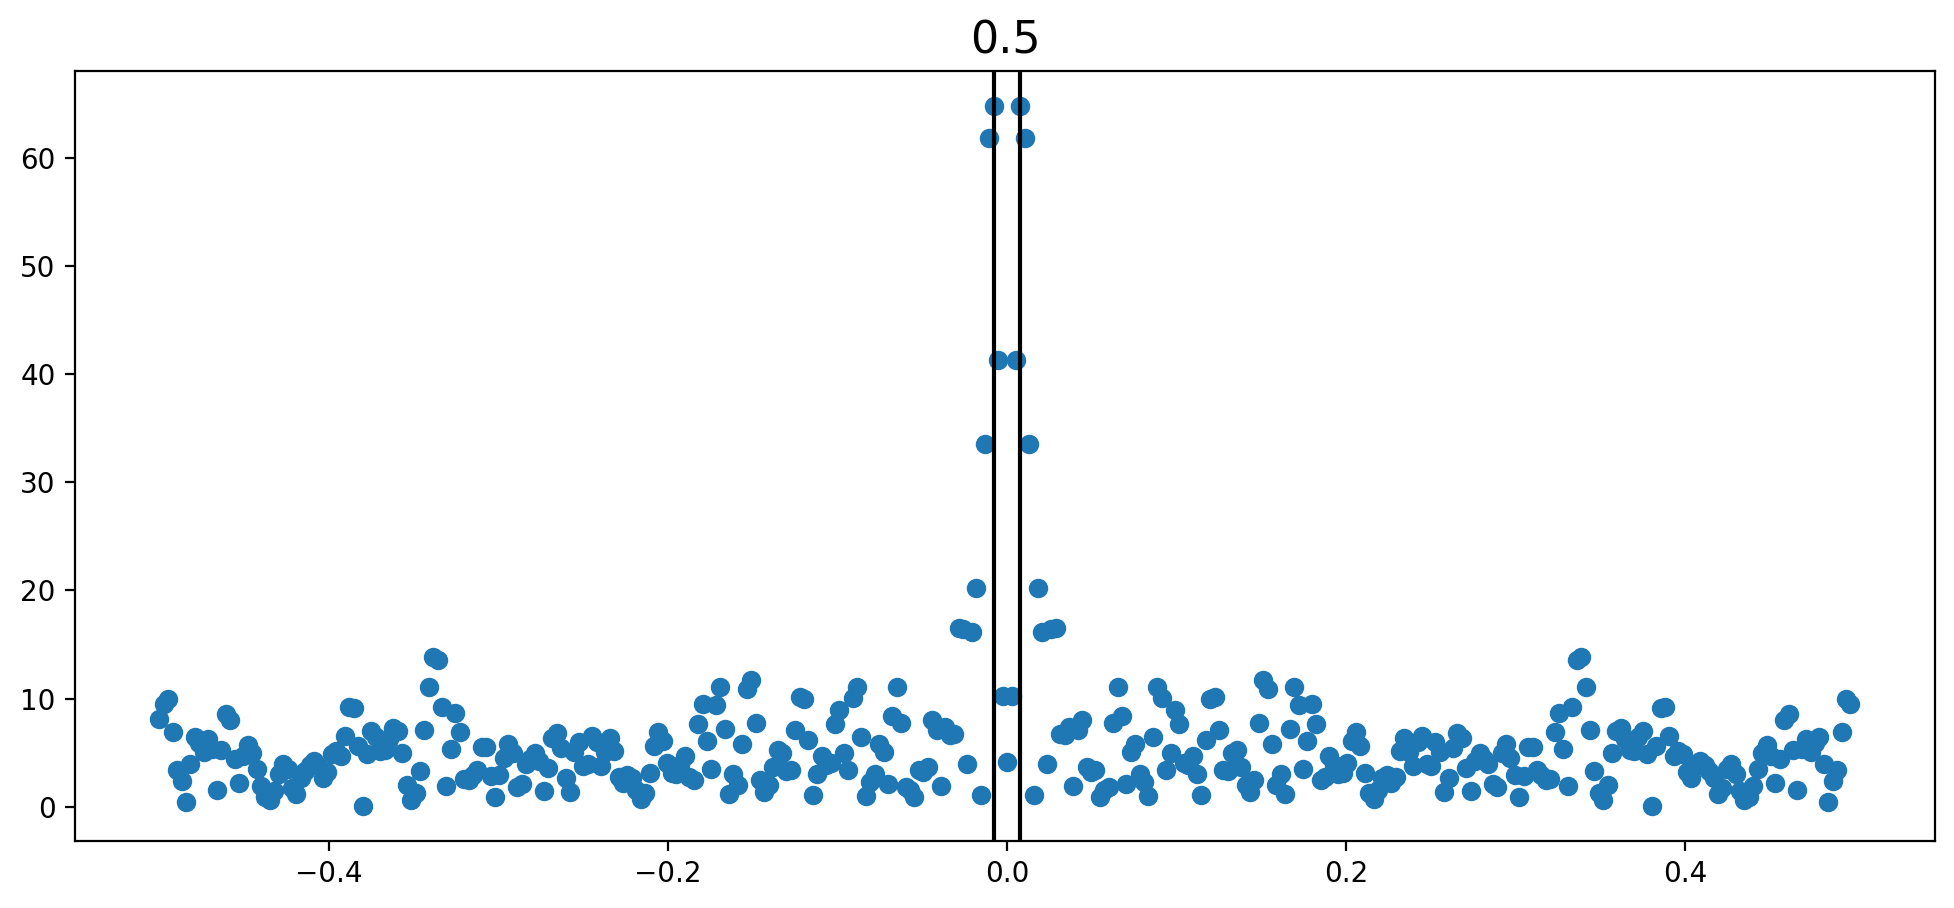

In [30]:
N = 128 
sigma_values = np.arange(0, 0.6, 0.1)
for sigma in sigma_values:
    plt.figure(figsize = (12, 5), dpi = 200)
    k = np.arange(-N, N * 2)
    x = np.cos(2 * np.pi * k / N) + sts.norm(loc = 0, scale = sigma).rvs(3 * N)
    x = x * (k < N) * (k > -1)
    freq = fft.fftfreq(x.shape[0], d = k[1] - k[0])
    amps = np.abs(fft.fft(x))
    plt.scatter(freq, amps)
    plt.title(sigma, fontsize = 16)
    plt.axvline(1 / N, color = 'black')
    plt.axvline(-1 / N, color = 'black')

__Вывод__

При добавлении шума растет амплитуда гармоник с высокими частотами(у шума спектр ровный на всех чатсотах). При этом базовые гармоники(связаны с синусом) остаются неизменными.